# Regression Analysis

Regression analysis used to model the relationship between a dependent variable and one or more independent variables.  There are many different types of regression analysis that can be performed outside the common Linear and Logistic Regression methods.

## Simple Linear Regression or Ordinary Least Squares

Perhaps the most common and simplest of all the Regression techniques.  The formula is familar to anyone who has taken linear algebra classes.

\begin{align}y_i = \alpha + \beta x_i + \epsilon_i\end{align}

* y = the dependent variable or the variable you want to predict.  Also called the response variable.
* alpha = intercept
* beta = slope of the 
* x = the independent variable or in the case of time series, it's the time interval
* epsilon is the error which accounts for randomness that our model cannot explain.  This is also referred to
as the predictor or explanatory variable.

The information you are trying to predict y using function of x.

### Assumptions

* There is a linear relationship
* No multicollinearity (more important with multi predictor variables)
* Zero Conditional mean
* Homoskedasticity - variance is constant in residuals
* No autocorrelation

### Outliers

An outlier is a data point that lies far from the regression line, relative to the other data points. An outlier can sometimes have a significant effect on a regression analysis. We need to identify outliers and remove them from the analysis when appropriate (if we find that an outlier is a measurement or recording error).




In [1]:
#setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm                                                                                                                          
import statsmodels.formula.api as smf                                                                                                                 
import statsmodels.tsa.api as smt   

%matplotlib inline

/Users/michaelbeale/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Example

The example data is 1895 to 2017 average temperature for the US.

,Value,Anomaly
Date,,
1895,50.34,-3.29
1896,51.99,-1.64
1897,51.56,-2.07
1898,51.43,-2.20
1899,51.01,-2.62


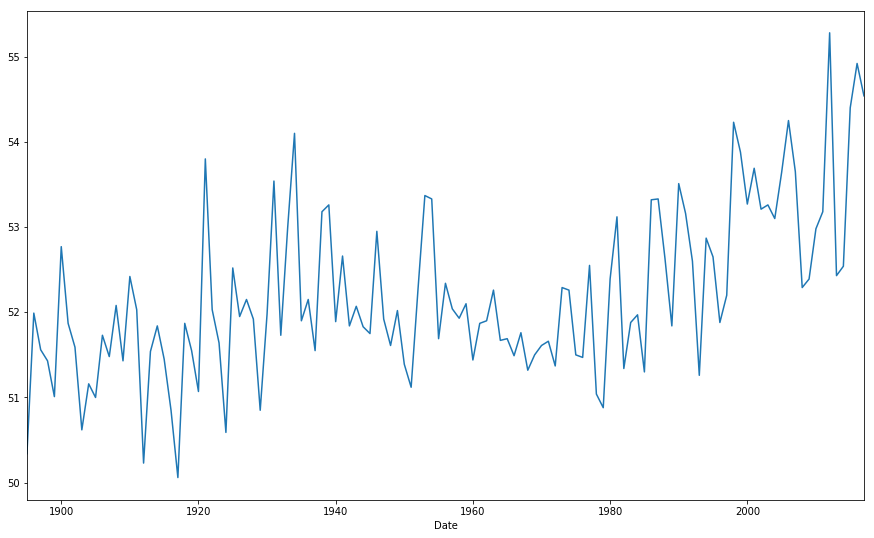

In [2]:
fig = plt.figure(1, figsize=(15, 9))
ax = fig.add_subplot(111)
df = pd.read_csv('data/usweather.csv')
df['Date'] = [int(str(x)[0:4]) for x in df['Date']]
df = df.set_index('Date')
#df = df.iloc[-43:]
#df = pd.DataFrame({'bill': [34,108,64,88,99,51], 'Value': [5,17,11,8,14,5]})
#df = df.set_index('bill')
df['Value'].plot(ax=ax)
df.head()

### Solve for a and b

![title](images/linearregressionequations.bmp)

 

In [3]:
# solve for b
# b (coefficient) represents the change in the dependent variable resulting from 1 unit change by the predictor

sum_y = np.sum(df['Value'])
sum_x = np.sum(df.index.tolist())
sum_y2 = np.sum(df['Value']**2)
sum_x2 = np.sum([x **2 for x in df.index])
sum_xy = np.sum(df['Value'] * df.index.tolist())
n = len(df)

b = (n*sum_xy - sum_x * sum_y) / (n*sum_x2 - (sum_x ** 2))
b



0.015093446492337792

In [4]:
# solve for a
# y (intercept) represents the depentdent value when x is 0
a = (sum_y * sum_x2 - sum_x * sum_xy) / (n*sum_x2 - (sum_x ** 2))
a

22.679088579673117

In [5]:
# apply formula
# df['estimate'] = y
df['Estimate'] = [a + b * x for x in df.index] 

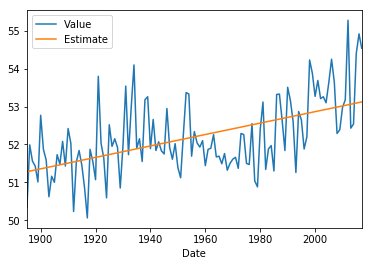

In [6]:
df[['Value', 'Estimate']].plot()

## Results

In the above chart, a simple regression line is displayed over the data.  The line can be compared to a trend for the data. There is a general upwards trend in average temperature over the last 100 or so years.

To validate the model, the residual errors need to be examined in time order.





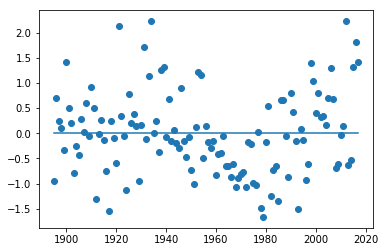

In [7]:
df['resids'] = df['Value'] - df['Estimate']
plt.scatter(df.index.tolist(), df['resids'].tolist())
plt.plot(df.index.tolist(), np.zeros(len(df)));



(<matplotlib.axes._subplots.AxesSubplot at 0x11a7ecb70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a8e4a58>)

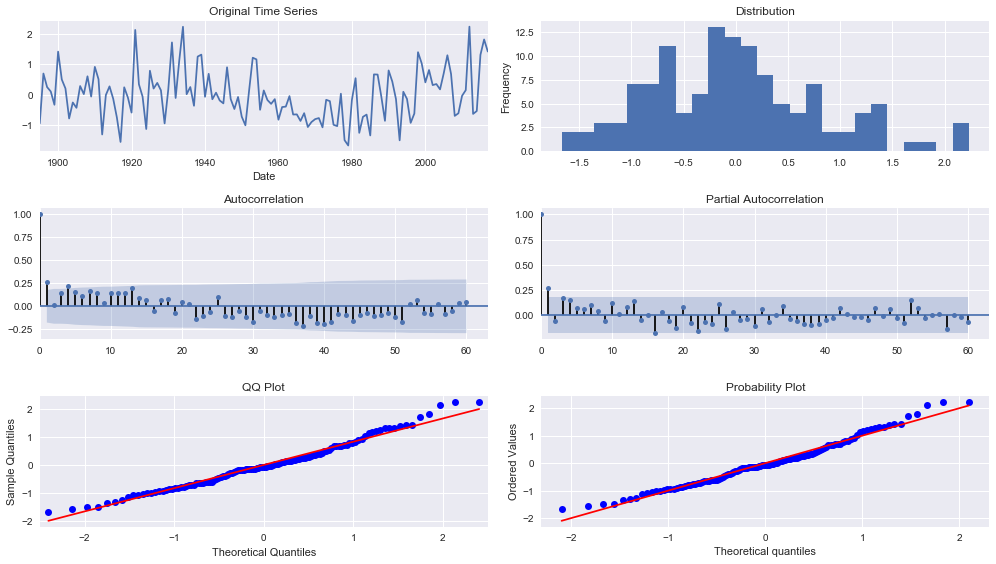

In [8]:
from helpers.time_series import tsplot
tsplot(df['resids'])

#### What to look for?

* The variance needs to be constant over time
* The residuals need to be normally distributed
* The residuals need to be random

__Original Time Series__

We can visualize the series to see that there is a mean of 0 and no change in variation for the residuals.  For
time series, the scatter plot and line chart can be used.

__Distribution__

Useful to check if the residuals are normally distributed (ideal is a bell curve). 

__Autocorellation__

No correlation (after 0) would indicate that the
residuals are random.

__Partial Autocorrelation__

Same as autocorrelation

__QQ Plot__

The QQ plot is a tool to assess the probability that the data came from a normal distribution.  By following along
a straight line, that would indicate that the values are normally distributed.

__Probability Plot__

Another tool to assess a normal distribution. For the most part, the normal P-P plot is better at finding deviations from normality in the center of the distribution, and the normal Q-Q plot is better at finding deviations in the tails.  Q-Q plots tend to be preferred in research situations.



### Model Checking

#### R-squared

R-squared is a measurement that takes the ratio of the model doesn't explain(differences between y and the estimate for y) and the total variation (y - the mean of y).

R-squared is a value between 0 and 1, with a score of 1 indicating that the model explains all the variability in the data. Generally, the higher the R-squared value the better.

**Note:**
Low values are not always bad.  It's possible to have a low R-squared value but still have statistically significant predictors.

Likewise a high R-squared doesn't always mean a good fit.  

In other words, R-squared is a good tool to use in combination with other result checking methods.

\begin{align} r^2 = \frac{SSR}{SST}\end{align}

#### Example

In [9]:
def r_squared(y_values, y_hat):
    mean_y = np.mean(y_values)
    SST = sum([(y - mean_y)**2 for y in y_values])
    #SSE = sum((y_values - y_hat)**2)
    SSR = sum([(y - mean_y)**2 for y in y_hat])
    return SSR / SST
    
print("The percent of variation of y explained by x: {0:.2f}%".format(r_squared(df['Value'], df['Estimate'])*100))


The percent of variation of y explained by x: 29.72%


#### Confindence interval

A confidence interval of the prediction is a range that is likely to contain the mean response given specified settings of the predictors in your model. Just like the regular confidence intervals, the confidence interval of the prediction presents a range for the coefficient rather than the distribution of individual data points.  

The interval is the probability that the sample coefficient is within a certain distance from the population coefficient not the probability that the population coefficient lies within the range.

First we need to calculate the standard error (aka Root Mean Square Error (RMSE)).



In [10]:
# find the standard error if the estimate
SE = np.sqrt(np.sum((df['Estimate'] - df['Value']) ** 2) / (len(df) - 2))
SE

0.83095417561704987

#### Interval estimate
![title](images/interval_estimate_regression.png)

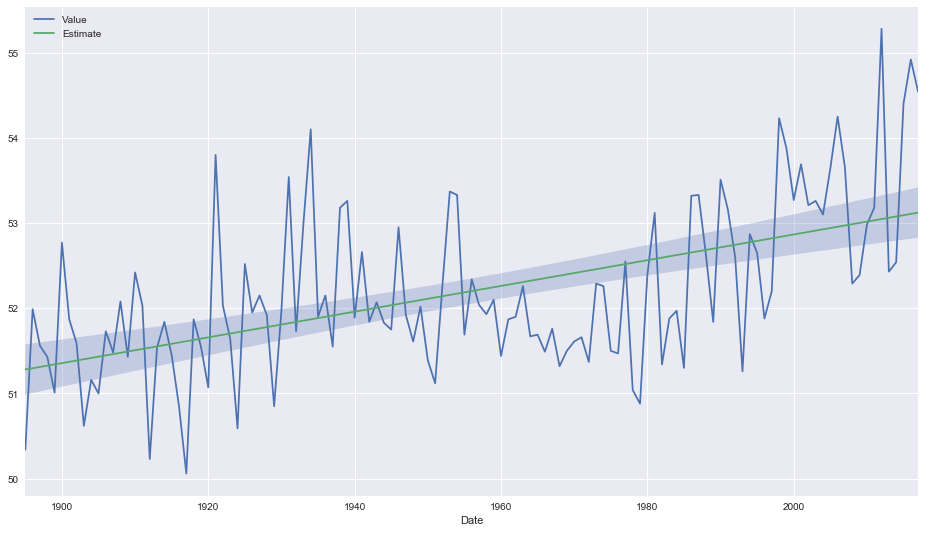

In [11]:
# construct 95% confidence interval
from scipy import stats

critical_t = stats.t.ppf(1-0.025, len(df) - 2)
mean_x = np.mean(df.index.values)
sum_x2 = np.sum([(x - mean_x)**2 for x in df.index.values])
df['ci_upper_bound'] = [(a + (b*x)) + critical_t * (SE * np.sqrt( (1 / len(df) + ((x - mean_x) **2 / sum_x2)))) for x in df.index]
df['ci_lower_bound'] = [(a + (b*x)) - critical_t * (SE * np.sqrt( (1 / len(df) + ((x - mean_x) **2 / sum_x2)))) for x in df.index]
fig = plt.figure(1, figsize=(16, 9))
ax = fig.add_subplot(111)
ax.fill_between(df.index, df['ci_lower_bound'], df['ci_upper_bound'], alpha=.25)

df[['Value','Estimate']].plot(ax=ax)

## Prediction Interval

The confidence interval is for the mean value of the dependent variable where the prediction interval is for an 
individual value.

![title](images/prediction_interval_estimate.png)



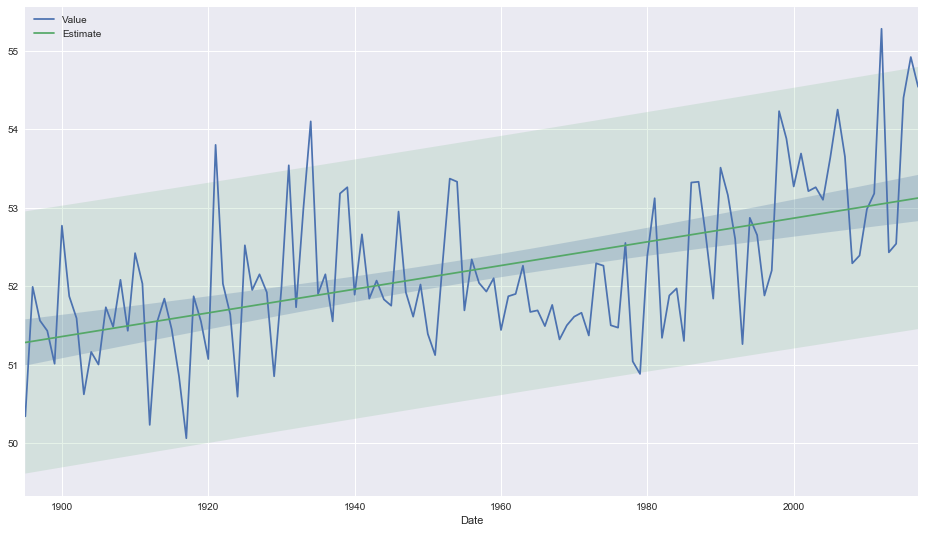

In [12]:

critical_t = stats.t.ppf(1-0.025, len(df) - 2)


df['pi_upper_bound'] = [(a + (b*x)) + critical_t * (SE * np.sqrt( (1 + (1 / len(df)) + ((x - mean_x) **2 / sum_x2)))) for x in df.index]
df['pi_lower_bound'] = [(a + (b*x)) - critical_t * (SE * np.sqrt( (1 + (1 / len(df)) + ((x - mean_x) **2 / sum_x2)))) for x in df.index]


fig = plt.figure(1, figsize=(16, 9))
ax = fig.add_subplot(111)
ax.fill_between(df.index, df['ci_lower_bound'], df['ci_upper_bound'], alpha=.25)
ax.fill_between(df.index, df['pi_lower_bound'], df['pi_upper_bound'], alpha=.15)

df[['Value','Estimate']].plot(ax=ax)



Both the CI and PI bow slightly around the centroid (where the mean of x and the mean of y meet).  The predictions are at their most accurate when closer to the mean.

#### P-value

The p-value is used to check if the predictors being used are statistically significant.  The null hypothesis states that there isn't an effect between the dependent and independent variables.    The p-value is the probability of getting the test statistic if the null hypothesis is true.  The smaller the p=value, the greater the evidence is against the null hypothesis (the standards are to use < 0.05 or < 0.001).

Not everyone is a fan of p values because of fluctuation in values with different samples. People who argue against p-values, generally use bayesian methods to assess the goodness of fit.

In [13]:
# find the test statistic
#first find standard error
numerator = np.sum((1 / (len(df) - 2)) * np.sum((df['resids'] ** 2)))
mean_x = np.mean(df.index.tolist())
denominator = np.sum((df.index.tolist() - mean_x) **2)
Sx = np.sqrt(numerator / denominator)


t_stat = b/Sx #coefficient / standard error

#probability of t_stat
p = 2*(1-stats.t.cdf(np.abs(t_stat), len(df)-2))
p

7.0765393545002553e-11

## Simple Regression using sklearn

All the calculations were to establish an intuition on how simple linear regression works but there are numerous established classes/functions that hanlde the calculations for you.

Model slope:     [ 0.01509345]
Model intercept: [ 22.67908858]
Model score: 0.297164242206


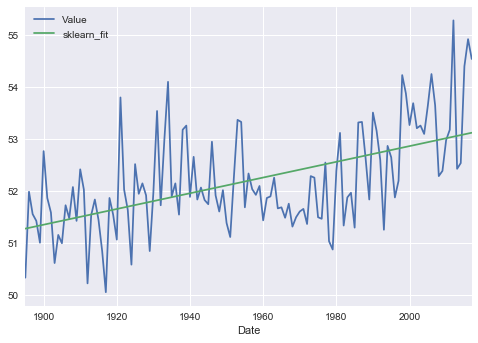

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x = df.index.values.reshape(-1, 1)
y = df['Value'].values.reshape(-1, 1)
model.fit(x, y)

yfit = model.predict(x)
df['sklearn_fit'] = yfit
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
print("Model score:", model.score(x, y))
df[['Value', 'sklearn_fit']].plot()

### Using statsmodel

Statsmodel also has a linear regression algorithm which also provides a summmary with information about the results of the regression estimation.

In [15]:
X = sm.add_constant(df.index.values)
model = sm.OLS(df['Value'].values, X)
reg = model.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           7.08e-11
Time:                        15:04:09   Log-Likelihood:                -150.74
No. Observations:                 123   AIC:                             305.5
Df Residuals:                     121   BIC:                             311.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6791      4.128      5.494      0.000      14.506      30.852
x1             0.0151      0.002      7.153      0.000       0.011       0.019
==============================================================================
Omnibus:                        4.710   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.499
Skew:                           0.468   Prob(JB):                        0.105
Kurtosis:                       3.022   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Diagnostics


The __Durbin Watson__ test reports a test statistic, with a value from 0 to 4, where:

* 2 is no autocorrelation.
* 0 to 2 is positive autocorrelation (common in time series data).
* 2 to 4 is negative autocorrelation (less common in time series data).

__Skew__ is a measure of how symmetrical the data are; a skewed variable is one whose mean is not in the middle of the distribution (i.e., the mean and median are quite different)

+/- 3 would indicate the data isn't normally distributed

__Kurtosis__ has to do with how peaked the distribution is, either too peaked or too flat. 

+/- 3 would indicate the data isn't normally distributed




In [16]:
reg.pvalues


array([  2.21536451e-07,   7.07653147e-11])

In [17]:
reg.conf_int(alpha=0.025, cols=[1])

array([[ 0.01030405,  0.01988284]])

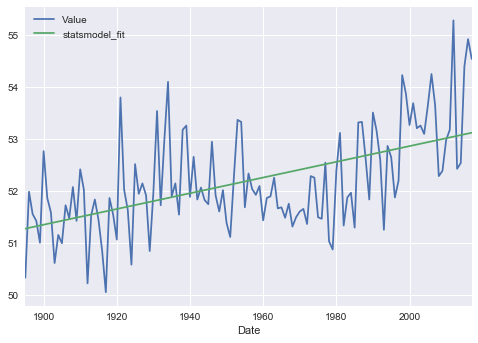

In [18]:
df['statsmodel_fit'] = reg.fittedvalues
df[['Value', 'statsmodel_fit']].plot()

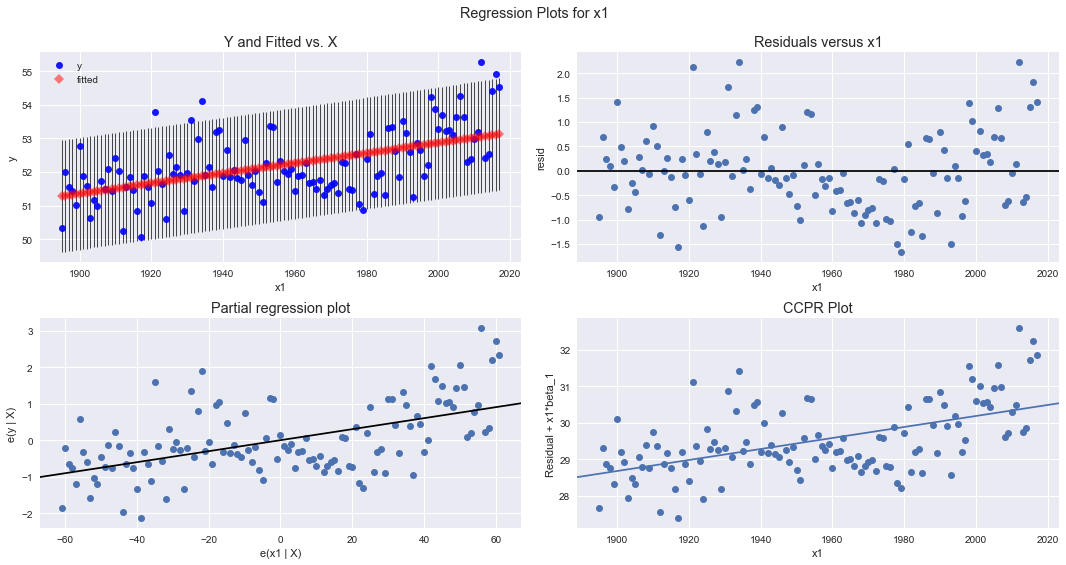

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(reg, "x1", fig=fig)

## Multiple Linear regression

\begin{align}Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + \epsilon\end{align}

Multiple linear regression is an extension of simple linear regression.  Instead of having 1 independent and 1 depndent variable, multiple linear regression has 2 or more independent variables to explain/predict the variance in one dependent variable.

#### Additional Issues for MLR

__Overfitting__:  This is caused by added too many independent variables.

__Multicollinearity__:  This happens when 2 or more of the independent variables are correlated with each other.


For a good regression analysis, the analyst:

* Uses large amounts of trustworthy data and a small number of predictors that have well established causal relationships.
* Uses sound reasoning for including variables in the model.
* Brings together different lines of research as needed.
* Effectively presents the results using graphs, confidence intervals, and prediction intervals in a clear manner that ensures proper interpretation by others.

 


In [29]:
#sample data
df = pd.DataFrame({'miles': [89, 66,78,111,44,77,80,66,109,76],
                  'deliveries': [4, 1, 3, 6, 1, 3, 3, 2,5,3],
                  'gas': [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25],
                  'time': [7, 5.4, 6.6, 7.4, 4.8, 6.4, 7, 5.6, 7.3, 6.4]})

#plt.scatter(df['time'], df['miles'].values)
X = sm.add_constant(df['miles'].values)


model = sm.OLS(df['time'].values, X)
reg = model.fit()
reg.summary()


/Users/michaelbeale/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           0.000107
Time:                        15:13:25   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1856      0.467      6.822      0.000       2.109       4.262
x1             0.0403      0.006      7.055      0.000       0.027       0.053
==============================================================================
Omnibus:                        0.542   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.554
Skew:                           0.370   Prob(JB):                        0.758
Kurtosis:                       2.115   Cond. No.                         353.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dummy Variables

Dummy variables (or categorical variables) are used to work with non-numeric data.   They can also be used to handle seasonal data.  In the IL weather data, using a simple linear regression yields an r-squared of 0, which states that the termperature isn't a function of time.  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                  0.004764
Date:                Sat, 16 Jun 2018   Prob (F-statistic):              0.945
Time:                        15:52:52   Log-Likelihood:                -485.86
No. Observations:                 113   AIC:                             975.7
Df Residuals:                     111   BIC:                             981.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.1942      3.362     15.526      0.0

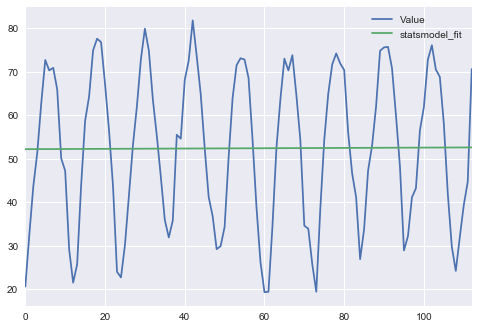

In [49]:

df = pd.read_csv('data/ilweather.csv')
#format date better
df['formatted_date'] = [pd.to_datetime(str(d) + str("01"), format="%Y/%m/%d") for d in df['Date']]
X = sm.add_constant(df.index.values)
model = sm.OLS(df['Value'].values, X)
reg = model.fit()
print(reg.summary())
df['statsmodel_fit'] = reg.fittedvalues
df[['Value', 'statsmodel_fit']].plot()

If we add categorie variables for the months, we can predict values using a seasonal coefficient.  N-1 variables are used because the last category will be a factor in the base coefficient.  The values encoded as 0s and 1s where 1 means categorical inclusive and 0 is categorical exclusion.

     Date  Value  Anomaly formatted_date  statsmodel_fit  jan  feb  mar  apr  \
0  200901   20.6     -5.0     2009-01-01           25.42    1    0    0    0   
1  200902   32.5      2.7     2009-02-01           29.97    0    1    0    0   
2  200903   43.6      1.2     2009-03-01           42.13    0    0    1    0   
3  200904   51.4     -2.4     2009-04-01           52.89    0    0    0    1   
4  200905   62.8     -0.9     2009-05-01           64.43    0    0    0    0   

   may  jun  jul  aug  sep  oct  nov  X  const  
0    0    0    0    0    0    0    0  0      1  
1    0    0    0    0    0    0    0  1      1  
2    0    0    0    0    0    0    0  2      1  
3    0    0    0    0    0    0    0  3      1  
4    1    0    0    0    0    0    0  4      1  


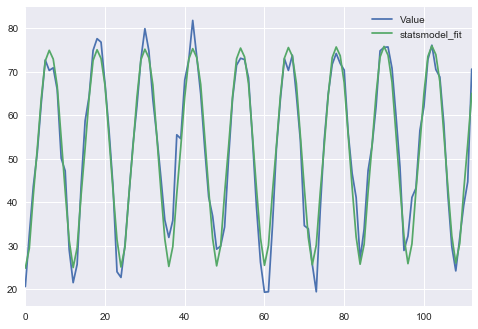

In [58]:
#add dummy variables
def generate_dummy(v, l):
    values = []
    month = 0
    for i in range(l):
        if v == month:
            values.append(1)
        else:
            values.append(0)
        month += 1
        if month >= 12:
            month = 0
    return values

#don't need dec because that will be all zeros for other months
#df['X'] = sm.add_constant(df.index.values)
X = sm.add_constant(df.index.values)
df['X'] = df.index.values
df['const'] = [1 for y in range(len(df))]
df['jan'] = generate_dummy(0, len(df))
df['feb'] = generate_dummy(1, len(df))
df['mar'] = generate_dummy(2, len(df))
df['apr'] = generate_dummy(3, len(df))
df['may'] = generate_dummy(4, len(df))
df['jun'] = generate_dummy(5, len(df))
df['jul'] = generate_dummy(6, len(df))
df['aug'] = generate_dummy(7, len(df))
df['sep'] = generate_dummy(8, len(df))
df['oct'] = generate_dummy(9, len(df))
df['nov'] = generate_dummy(10, len(df))


print(df.head())

#generate model

mod = sm.OLS(df['Value'], df[['X', 'const','jan', 'feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']])

reg = mod.fit()
reg.summary()
df['statsmodel_fit'] = reg.fittedvalues
df[['Value', 'statsmodel_fit']].plot()

    


In [59]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.16e-58
Time:                        16:12:17   Log-Likelihood:                -318.39
No. Observations:                 113   AIC:                             662.8
Df Residuals:                     100   BIC:                             698.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.0107      0.012      0.859      0.392      -0.014       0.035
const         31.1143      1.612     19.306      0.000      27.917      34.312
jan           -6.2710      1.979     -3.169      0.002     -10.197      -2.345
feb           -1.7317      1.979     -0.875      0.384      -5.657       2.194
mar           10.4176      1.978      5.266      0.000       6.492      14.343
apr           21.1669      1.978     10.700      0.000      17.242      25.092
may           32.6962      1.978     16.529      0.000      28.772      36.621
jun           41.3085      2.031     20.341      0.000      37.279      45.338
jul           43.7423      2.030     21.544      0.000      39.714      47.771
aug           41.7205      2.030     20.551      0.000      37.693      45.748
sep           35.4987      2.030     17.489      0.000      31.472      39.526
oct           23.5103      2.030     11.584      0.000      19.484      27.537
nov           11.3662      2.029      5.601      0.000       7.340      15.393
==============================================================================
Omnibus:                        4.117   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                5.010
Skew:                           0.080   Prob(JB):                       0.0817
Kurtosis:                       4.019   Cond. No.                         826.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Time series

Trends can add correlation where there isn't any.  Converting to log values or first differences could help the accuracy of the model.  

# Tips and tricks

* Basis Function Regression
* lurking variables
* Dummy variables
* one-hot-encoding
* transformation in regression - http://stattrek.com/regression/linear-transformation.aspx?Tutorial=AP
* standardized values
* https://www.r-bloggers.com/the-frisch-waugh-lovell-theorem-for-both-ols-and-2sls/
* r-squared adjusted http://www.statisticshowto.com/adjusted-r2/
* r-squared predicted
* adding a constant
* choosing predictive variables https://en.wikipedia.org/wiki/Stepwise_regression
* http://blog.minitab.com/blog/adventures-in-statistics-2/proxy-variables-the-good-twin-of-confounding-variables
* VIFs are your friend! Variance inflation factor (VIF) is an easy to use measure of multicollinearity.

VIF values greater than 10 may indicate that multicollinearity is unduly influencing your regression results. If you see high VIF values, you may want to remove some of the correlated predictors from your model.

Thirdly, linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.
Multicollinearity may be tested with three central criteria:
1) Correlation matrix – when computing the matrix of Pearson’s Bivariate Correlation among all independent variables the correlation coefficients need to be smaller than 1.
2) Tolerance – the tolerance measures the influence of one independent variable on all other independent variables; the tolerance is calculated with an initial linear regression analysis.  Tolerance is defined as T = 1 – R² for these first step regression analysis.  With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.
3) Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables.




